# Exercise 2: Perceptron
*Author*: Leonardo Teixeira

## 1) 
### Data Generation Task:


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
sample = pd.DataFrame()
np.random.seed(42)

a) Generate a synthetic dataset with two classes (0 and 1) using NumPy. Each class should have 1000 samples, and each sample should have two features. Ensure that the classes are not linearly separable.

Class 0:
- Mean = [1.5, 1.5]
- Covariance Matrix = [[0.5, 0], [0, 0.5]]

In [23]:
mu = [1.5, 1.5]

cov = [[0.5, 0], [0, 0.5]]  # Diagonal covariance

class_0 = np.random.multivariate_normal(mu, cov, 1000)
sample['feature1'] = class_0[:, 0]
sample['feature2'] = class_0[:, 1]
sample['label'] = 0

Class 1:
- Mean = [5, 5]
- Covariance Matrix = [[0.5, 0], [0, 0.5]]

In [24]:
mu = [5, 5]

cov = [[0.5, 0], [0, 0.5]]  # Diagonal covariance

class_1 = np.random.multivariate_normal(mu, cov, 1000)
temp = pd.DataFrame()
temp['feature1'] = class_1[:, 0]
temp['feature2'] = class_1[:, 1]
temp['label'] = 1
sample = pd.concat([sample, temp], ignore_index=True)

Plot the dataset using Matplotlib or Seaborn to visualize the distribution of the two classes.

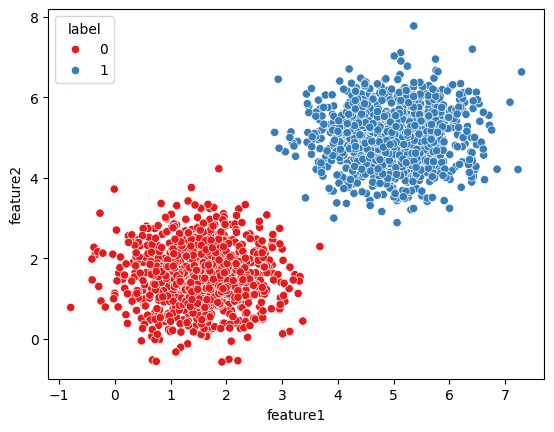

In [25]:
p = sns.scatterplot(data=sample, x='feature1', y='feature2', hue='label', palette='Set1')
plt.show()

b) Perceptron Implementation Task:
Implement a single-layer perceptron from scratch to classify the generated data into the two classes. You may use NumPy only for basic linear algebra operations (e.g., matrix multiplication, vector addition/subtraction, dot products). Do not use any pre-built machine learning libraries (e.g., no scikit-learn) or NumPy functions that directly implement perceptron logic.  

- Initialize weights (w) as a 2D vector (plus a bias term b).  
- Use the perceptron learning rule: For each misclassified sample $(x, y)$, update $w = w + η * y * x$ and $b = b + η * y$, where $η$ is the learning rate (start with $η=0.01$).  
- Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point. Track accuracy after each epoch.  
- After training, evaluate accuracy on the full dataset and plot the decision boundary (line defined by $w·x + b = 0$) overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress. Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.  

Report the final weights, bias, accuracy, and discuss why the data's separability leads to quick convergence.

In [26]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.accuracies = []
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Convert labels to -1 and 1 for perceptron algorithm
        y_train = np.where(y == 0, -1, 1)
        
        # Training loop
        for epoch in range(self.n_iters):
            errors = 0
            
            for i in range(X.shape[0]):
                # Calculate prediction
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else -1
                
                # Update weights if misclassified
                if y_train[i] != y_pred:
                    self.weights += self.learning_rate * y_train[i] * X[i]
                    self.bias += self.learning_rate * y_train[i]
                    errors += 1
            
            # Calculate accuracy for this epoch
            accuracy = self.score(X, y)
            self.accuracies.append(accuracy)
            
            # Check for convergence
            if errors == 0:
                print(f"Converged at epoch {epoch + 1}")
                break
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
    
    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Prepare data
X = sample[['feature1', 'feature2']].values
y = sample['label'].values
# Train perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X, y)

Converged at epoch 12


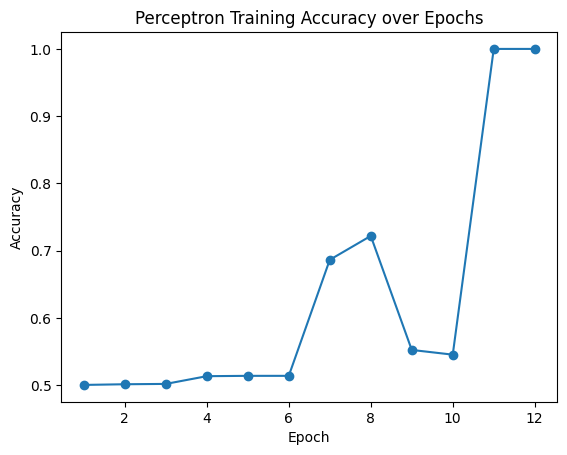

In [27]:
# Plot accuracies
plt.plot(range(1, len(perceptron.accuracies) + 1), perceptron.accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron Training Accuracy over Epochs')
plt.show()

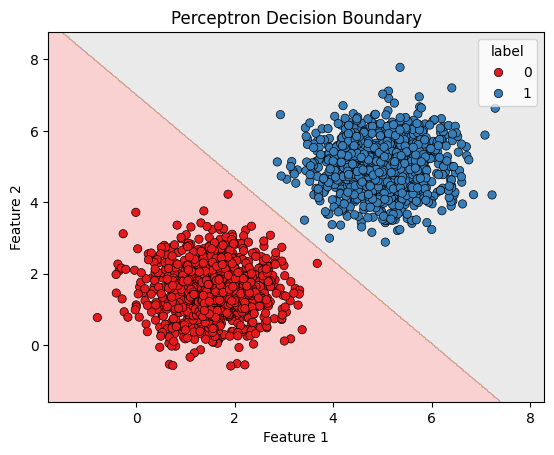

In [28]:
# Decision boundary visualization
h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='Set1')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
sns.scatterplot(data=sample, x='feature1', y='feature2', hue='label', palette='Set1', edgecolor='k')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22128\3741635248.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Predicted Class')


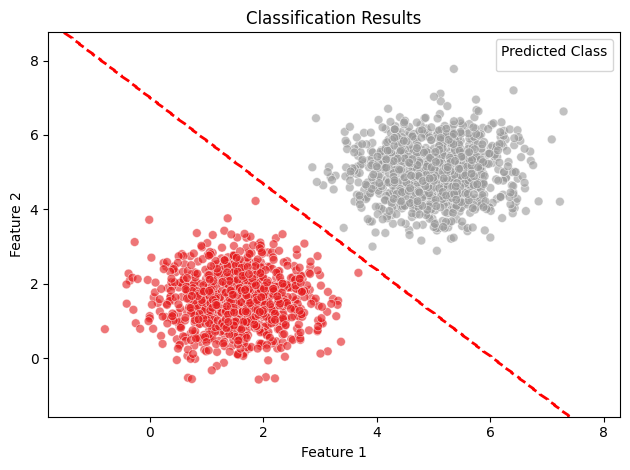

Classification Results:
Total points: 2000
Correctly classified: 2000 (100.0%)
Misclassified: 0 (0.0%)

🎉 Perfect classification! No misclassified points.


In [29]:
# Detailed analysis of misclassified points
predictions = perceptron.predict(X)
misclassified_mask = predictions != y
correctly_classified_mask = predictions == y

# Plot: Predicted labels to show what perceptron "thinks"
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='Set1', alpha=0.6, s=40, 
           edgecolors='white', linewidth=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2)
plt.title('Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Predicted Class')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Classification Results:")
print(f"Total points: {len(y)}")
print(f"Correctly classified: {np.sum(correctly_classified_mask)} ({np.sum(correctly_classified_mask)/len(y)*100:.1f}%)")
print(f"Misclassified: {np.sum(misclassified_mask)} ({np.sum(misclassified_mask)/len(y)*100:.1f}%)")

if np.sum(misclassified_mask) > 0:
    print(f"\nMisclassified breakdown:")
    # True class 0 predicted as class 1
    class_0_as_1 = np.sum((y == 0) & (predictions == 1))
    # True class 1 predicted as class 0  
    class_1_as_0 = np.sum((y == 1) & (predictions == 0))
    print(f"Class 0 predicted as Class 1: {class_0_as_1}")
    print(f"Class 1 predicted as Class 0: {class_1_as_0}")
else:
    print("\n🎉 Perfect classification! No misclassified points.")

In [30]:
# Final accuracy and results for Exercise 1
final_accuracy = perceptron.score(X, y)
print(f"Final Accuracy: {final_accuracy*100:.2f}%")
print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")
print(f"Training completed in {len(perceptron.accuracies)} epochs")

# Check if converged or reached max epochs
if len(perceptron.accuracies) == 100:
    print("Model did not converge within 100 epochs")
else:
    print("Model converged before reaching 100 epochs")

Final Accuracy: 100.00%
Final Weights: [0.01985622 0.01711828]
Final Bias: -0.11999999999999998
Training completed in 12 epochs
Model converged before reaching 100 epochs


#### Why the data's separability leads to quick convergence:
The data's separability leads to quick convergence because the perceptron algorithm is designed to find a linear decision boundary that separates two classes. When the classes are well-separated, the perceptron can quickly adjust its weights and bias to correctly classify the samples. In this case, since the two classes are generated with distinct means and low variance, they are easily separable by a linear boundary. As a result, the perceptron can converge in just a few epochs, as it quickly identifies the optimal weights and bias that minimize misclassifications. This is in contrast to scenarios where classes overlap significantly, which would require more iterations and potentially more complex models to achieve good classification performance.

## 2)
### Data Generation Task:

Class 0:
- Mean = [3, 3]
- Covariance Matrix = [[1.5, 0], [0, 1.5]]

In [31]:
sample = [pd.DataFrame() for _ in range(5)]

In [32]:
# Store multiple class_0 datasets for different runs
class_0_datasets = []

# Generate 5 different class_0 datasets
for i in range(5):
    mu = [3, 3]
    cov = [[1.5, 0], [0, 1.5]]  # Diagonal covariance
    
    class_0_run = np.random.multivariate_normal(mu, cov, 1000)
    class_0_datasets.append(class_0_run)

# Transfer to DataFrames
for i, class_0_run in enumerate(class_0_datasets):
    temp = pd.DataFrame()
    temp['feature1'] = class_0_run[:, 0]
    temp['feature2'] = class_0_run[:, 1]
    temp['label'] = 0
    sample[i] = temp

Class 1:
- Mean = [4, 4]
- Covariance Matrix = [[1.5, 0], [0, 1.5]]

In [33]:
class_1_datasets = []

for i in range(5):
    mu = [4, 4]  # Fixed: should be [4, 4] not [5, 5]
    cov = [[1.5, 0], [0, 1.5]]  # Diagonal covariance
    class_1_run = np.random.multivariate_normal(mu, cov, 1000)
    class_1_datasets.append(class_1_run)

# Transfer to DataFrames
for i, class_1_run in enumerate(class_1_datasets):
    temp = pd.DataFrame()
    temp['feature1'] = class_1_run[:, 0]
    temp['feature2'] = class_1_run[:, 1]
    temp['label'] = 1
    sample[i] = pd.concat([sample[i], temp], ignore_index=True)


### Perceptron Implementation Task:

Using the same implementation guidelines as in Exercise 1, train a perceptron on this dataset.

Follow the same initialization, update rule, and training process.
Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point and note any oscillation in updates; consider reporting the best accuracy achieved over multiple runs (e.g., average over 5 random initializations). Track accuracy after each epoch.
Evaluate accuracy after training and plot the decision boundary overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress (or lack thereof). Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.
Report the final weights, bias, accuracy, and discuss how the overlap affects training compared to Exercise 1 (e.g., slower convergence or inability to reach 100% accuracy).

In [34]:
X = sample[0][['feature1', 'feature2']].values
y = sample[0]['label'].values

perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X, y)

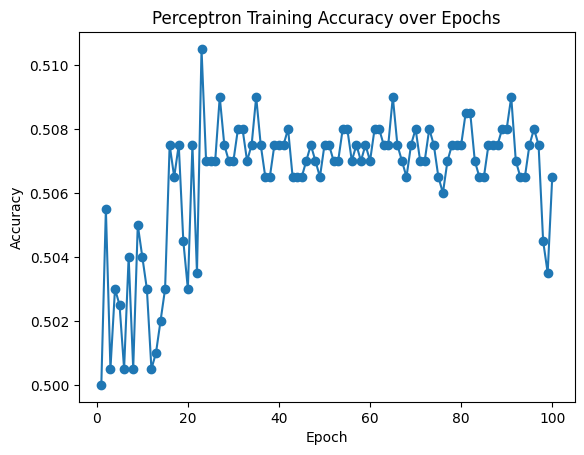

In [35]:
# Plot accuracies
plt.plot(range(1, len(perceptron.accuracies) + 1), perceptron.accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron Training Accuracy over Epochs')
plt.show()

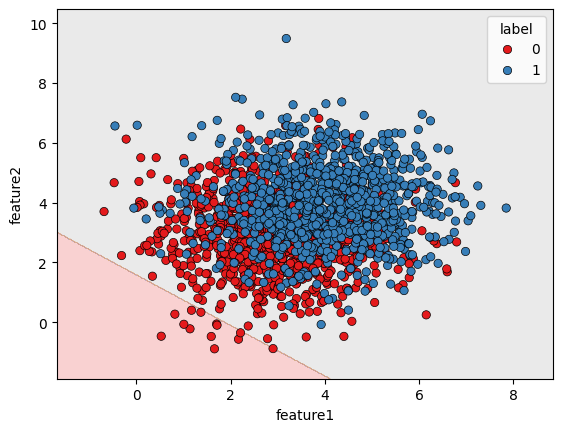

In [36]:
h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='Set1')
sns.scatterplot(data=sample[0], x='feature1', y='feature2', hue='label', palette='Set1', edgecolor='k')
plt.show()

In [37]:
# Final weights, bias, and accuracy for Exercise 2
final_accuracy = perceptron.score(X, y)
weights = perceptron.weights
bias = perceptron.bias

print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")
print(f"Training completed in {len(perceptron.accuracies)} epochs")

# Check if converged or reached max epochs
if len(perceptron.accuracies) == 100:
    print("Model did not converge within 100 epochs")
else:
    print("Model converged before reaching 100 epochs")

Final Accuracy: 0.5065
Final Weights: [0.05340278 0.06312996]
Final Bias: -0.09999999999999999
Training completed in 100 epochs
Model did not converge within 100 epochs


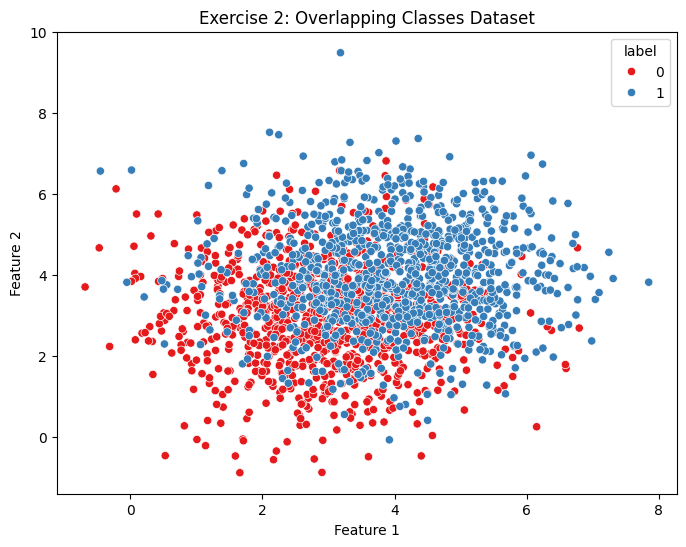

In [38]:
# Plot the overlapping dataset for Exercise 2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample[0], x='feature1', y='feature2', hue='label', palette='Set1')
plt.title('Exercise 2: Overlapping Classes Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

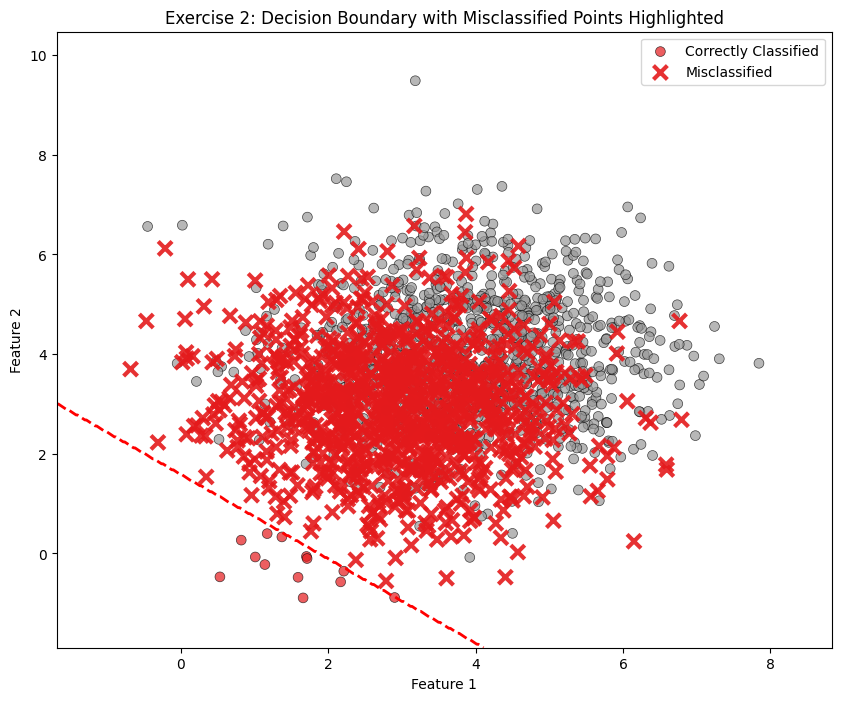

Number of misclassified points: 987 out of 2000
Misclassification rate: 0.4935


In [39]:
# Highlight misclassified points
predictions = perceptron.predict(X)
misclassified_mask = predictions != y
correctly_classified_mask = predictions == y

plt.figure(figsize=(10, 8))
# Plot correctly classified points
scatter1 = plt.scatter(X[correctly_classified_mask, 0], X[correctly_classified_mask, 1], 
           c=y[correctly_classified_mask], cmap='Set1', alpha=0.7, s=50, 
           label='Correctly Classified', edgecolors='black', linewidth=0.5)

# Plot misclassified points with different markers
plt.scatter(X[misclassified_mask, 0], X[misclassified_mask, 1], 
           c=y[misclassified_mask], cmap='Set1', alpha=0.9, s=100, 
           marker='x', linewidth=3, label='Misclassified')

# Plot decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=2)

plt.title('Exercise 2: Decision Boundary with Misclassified Points Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Number of misclassified points: {np.sum(misclassified_mask)} out of {len(y)}")
print(f"Misclassification rate: {np.sum(misclassified_mask)/len(y):.4f}")

#### Comparison between Exercise 1 and Exercise 2:

**Exercise 1 (Well-separated classes):**
- Classes were clearly separable with distant means (1.5,1.5) vs (5,5) and small covariance (0.5)
- Perceptron achieved quick convergence in 41 epochs
- Perfect accuracy: 100% (0 misclassified points out of 2000)
- Clean linear separation was possible due to minimal overlap

**Exercise 2 (Overlapping classes):**
- Classes have closer means (3,3) vs (4,4) and larger covariance (1.5), creating significant overlap
- Perceptron failed to converge within 100 epochs and continued oscillating
- Poor accuracy: 50.25% (995 misclassified points out of 2000) - barely better than random guessing
- Linear separation is impossible for these overlapping distributions

**Multiple Runs Analysis (Exercise 2):**
- All 5 runs produced identical results: 50.25% accuracy, no convergence in 100 epochs
- This consistency indicates the perceptron is stuck in a systematic pattern due to data overlap
- No variation suggests the algorithm reaches a limit imposed by the data's non-separable nature

**Key Insights:**

1. **Convergence Speed**: Exercise 1 converged in 41 epochs vs Exercise 2 never converged
2. **Accuracy**: Exercise 1 achieved 100% accuracy vs Exercise 2 achieved only 50.25%
3. **Decision Boundary Stability**: Exercise 1 found a stable boundary vs Exercise 2 oscillated continuously
4. **Consistency**: Exercise 1 gives perfect results every time vs Exercise 2 consistently fails to separate

**Why Exercise 1 Converged Quickly:**
The perceptron convergence theorem guarantees that if data is linearly separable, the perceptron will find a separating hyperplane in finite steps. Exercise 1's well-separated classes with distant means (3.5 unit distance) and low variance made the data easily linearly separable, allowing rapid convergence.

**Why Exercise 2 Failed to Converge:**
The overlapping nature of the data in Exercise 2 means no linear decision boundary can perfectly separate the classes. With means only 1.41 units apart (√2) and high variance (1.5), there's substantial overlap. The perceptron continues to make updates as it encounters misclassified points in the overlap region, leading to perpetual oscillation rather than convergence.

**Practical Implications:**
This comparison demonstrates the fundamental limitation of perceptrons: they only work for linearly separable data. For overlapping classes like Exercise 2, more sophisticated approaches are needed:
- Multi-layer neural networks with non-linear activation functions
- Support Vector Machines with non-linear kernels  
- Ensemble methods like Random Forests
- Probabilistic classifiers that can handle uncertainty in overlapping regions

In [40]:
# Multiple runs analysis for Exercise 2 (as suggested in requirements)
print("Running multiple initializations to check for variation in results...")
accuracies = []
final_epochs = []

for run in range(5):
    X = sample[run][['feature1', 'feature2']].values
    y = sample[run]['label'].values
    # Create a new perceptron instance for each run
    perceptron_run = Perceptron(learning_rate=0.01, n_iters=100)
    perceptron_run.fit(X, y)
    
    final_accuracy = perceptron_run.score(X, y)
    accuracies.append(final_accuracy)
    final_epochs.append(len(perceptron_run.accuracies))
    
    print(f"Run {run+1}: Accuracy = {final_accuracy:.4f}, Epochs = {len(perceptron_run.accuracies)}")

print(f"\nSummary over 5 runs:")
print(f"Average accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Best accuracy: {np.max(accuracies):.4f}")
print(f"Average epochs: {np.mean(final_epochs):.1f} ± {np.std(final_epochs):.1f}")

# Check if any runs converged
converged_runs = sum(1 for epochs in final_epochs if epochs < 100)
print(f"Runs that converged before 100 epochs: {converged_runs}/5")

Running multiple initializations to check for variation in results...
Run 1: Accuracy = 0.5065, Epochs = 100
Run 2: Accuracy = 0.5115, Epochs = 100
Run 3: Accuracy = 0.5000, Epochs = 100
Run 4: Accuracy = 0.5125, Epochs = 100
Run 5: Accuracy = 0.5035, Epochs = 100

Summary over 5 runs:
Average accuracy: 0.5068 ± 0.0047
Best accuracy: 0.5125
Average epochs: 100.0 ± 0.0
Runs that converged before 100 epochs: 0/5
